In [1]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd

### Categoricals

* Q) 아래의 데이터프레임이 존재한다. '국가' 데이터(열)을 범주형 데이터로 변환하시오. 이떄 열 이름을 '대륙_카테고리'로 하시오.

In [5]:
df = pd.DataFrame({"기업":["현대","삼성","벤츠","애플","테슬라"], "국가":["한국","한국","독일","미국","미국"]})

In [15]:
df["대륙_카테고리"] = df["국가"].astype("category")
df

,기업,국가,대륙_카테고리
0,현대,한국,한국
1,삼성,한국,한국
2,벤츠,독일,독일
3,애플,미국,미국
4,테슬라,미국,미국


* Q) 생각해보니 대륙 카테고리입니다. 대륙_카테고리를 대륙별로 새롭게 범주화하시오(유럽/아메리카/아시아).

In [26]:
df["대륙_카테고리"].cat.categories=["유럽", "아메리카", "아시아"]
df

,기업,국가,대륙_카테고리
0,현대,한국,아시아
1,삼성,한국,아시아
2,벤츠,독일,유럽
3,애플,미국,아메리카
4,테슬라,미국,아메리카


* Q) 대륙 카테고리에 빠진 대륙들을 추가해주시오. 빠진 대륙은 (아프리카, 오세아니아) 입니다.

In [29]:
df["대륙_카테고리"].cat.set_categories(["유럽", "아메리카", "아시아", "아프리카", "오세아니아"])

0     아시아
1     아시아
2      유럽
3    아메리카
4    아메리카
Name: 대륙_카테고리, dtype: category
Categories (5, object): ['유럽', '아메리카', '아시아', '아프리카', '오세아니아']

* Q) 대륙 카테고리를 기준으로 데이터프레임을 정렬하시오(유럽, 아메리카, 이시아, 아프리카, 오세아니아 순으로).

In [30]:
df.sort_values("대륙_카테고리")

,기업,국가,대륙_카테고리
2,벤츠,독일,유럽
3,애플,미국,아메리카
4,테슬라,미국,아메리카
0,현대,한국,아시아
1,삼성,한국,아시아


* Q) 대륙 카테고리 별 기업의 숫자를 구하시오.

In [34]:
df["대륙_카테고리"].value_counts()

아시아     2
아메리카    2
유럽      1
Name: 대륙_카테고리, dtype: int64

### Getting Data In / Out

* Q) 공유한 happiness_data.csv 파일을 읽고 df 이름의 객체로 저장하시오.

In [107]:
url = "https://raw.githubusercontent.com/sheon-j/pandas-study/main/datasets/happiness_data.csv"
df = pd.read_csv(url)
df.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707


* Q) df에서 country_name이 "South Korea"인 데이터만 필터(filter)한 후 happiness_data_korea.csv 파일(index가 없는 상태)로 저장하시오.

In [108]:
df_korea = df[df["country_name"]=="South Korea"].reset_index(drop=True)
df_korea.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,South Korea,East Asia,2006,5.332,10.310,0.775,70.2,0.715,-0.052,0.799
1,South Korea,East Asia,2007,5.767,10.361,0.827,70.5,0.656,-0.059,0.803
2,South Korea,East Asia,2008,5.390,10.383,0.754,70.8,0.524,-0.102,0.771


In [109]:
df_korea.to_csv("happiness_data_korea.csv", index=False)

* Q) happiness_data_korea.csv 파일을 읽고 df2 이름의 객체로 저장하시오.

In [110]:
df2 = pd.read_csv("happiness_data_korea.csv")
df2.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,South Korea,East Asia,2006,5.332,10.310,0.775,70.2,0.715,-0.052,0.799
1,South Korea,East Asia,2007,5.767,10.361,0.827,70.5,0.656,-0.059,0.803
2,South Korea,East Asia,2008,5.390,10.383,0.754,70.8,0.524,-0.102,0.771


* df2 데이터프레임에서 social_support가 0.79 이상이며 동시에 freedom_to_make_life_choices가 0.65 이상인 데이터를 필터링한 후 high_happiness.h5 파일의 df3로 저장하시오.

In [88]:
df2_filtered = df2[
    (df2["social_support"]>=0.79) & 
    (df2["freedom_to_make_life_choices"]>=0.65)
]
df2_filtered.head(3)

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
1,South Korea,East Asia,2007,5.767,10.361,0.827,70.50,0.656,-0.059,0.803
4,South Korea,East Asia,2010,6.116,10.447,0.816,71.40,0.677,-0.033,0.752
5,South Korea,East Asia,2011,6.947,10.475,0.809,71.66,0.682,-0.048,0.827


In [99]:
df2_filtered.to_hdf("high_happiness.h5","df3")

* high_happiness.h5파일의 df3을 읽고 df3 이름의 객체로 저장하시오.

In [90]:
# error: version issue!
# df3 = pd.read_hdf("high_happiness.h5", "df3")

df3 = df2_filtered

* df3의 2번째와 3번째 행(index가 4,5번인 행)을 subsetting 한후 df4.xlsx 파일(Sheet 이름은 "Sheet1", index가 없는 상태)으로 저장하시오.

In [97]:
df3_sub = df3.iloc[1:3]
df3_sub

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
4,South Korea,East Asia,2010,6.116,10.447,0.816,71.40,0.677,-0.033,0.752
5,South Korea,East Asia,2011,6.947,10.475,0.809,71.66,0.682,-0.048,0.827


In [98]:
df3_sub.to_excel("df4.xlsx", sheet_name="Sheet1", index=False)

* df4.xlsx 파일을 읽고 df4 이름의 객체로 저장하시오.

In [102]:
df4 = pd.read_excel("df4.xlsx")
df4

,country_name,regional_indicator,year,happiness,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,South Korea,East Asia,2010,6.116,10.447,0.816,71.40,0.677,-0.033,0.752
1,South Korea,East Asia,2011,6.947,10.475,0.809,71.66,0.682,-0.048,0.827


### Plotting

* 공유한 happiness_data.csv 파일을 읽고 df 이름의 객체로 저장하시오.
* df에서 country_name이 "South Korea"인 데이터만 필터(filter)한 후 df_korea로 저장하시오.
* df_korea에서 "year"과 "happiness" column만을 select 한 뒤, index을 "year"로 설정한 후 그래프로 그려보시오.

* matplotlib의 pyplot을 활용하여 다음을 구하시오.
* 년도별 regional_indicator 별 평균 행복을 도표로 구하시오.

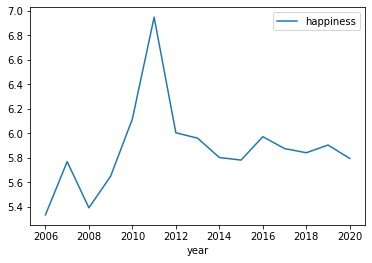

In [116]:
df_korea[["year", "happiness"]].set_index("year").plot();

In [139]:
df_happ_mean = df.groupby(["year", "regional_indicator"]).mean()["happiness"].round(2)
df_happ_mean

year  regional_indicator          
2005  Central and Eastern Europe      5.57
      East Asia                       6.52
      Latin America and Caribbean     6.80
      Middle East and North Africa    5.68
      North America and ANZ           7.38
                                      ... 
2020  North America and ANZ           7.11
      South Asia                      4.75
      Southeast Asia                  5.01
      Sub-Saharan Africa              4.76
      Western Europe                  6.92
Name: happiness, Length: 157, dtype: float64

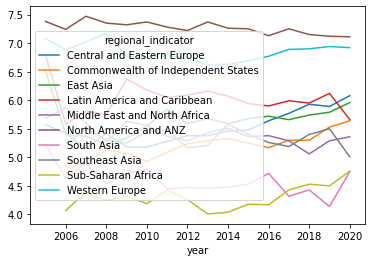

In [140]:
df_happ_mean.unstack().plot();

### Gotchas(Using if/truth statements with pandas)

* 아래 코드의 Pandas Series는 False도 포함하고 있으며 False도, 또한 길이가 1 이상 이기에 True가 될 수 있는 상황이여서 에러가 발생합니다.

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

* Pandas Series 중 하나라도 True인 경우를 만족하고 싶은 경우 `.any()`를 사용하면 됩니다.

In [ ]:
if pd.Series([False, True, False]).any():
    print("At least one True included")
else:
    print("No True included")

There is at least one True included


* Pandas Series가 모두 True인 경우를 만족하고 싶은 경우 `.all()`을 사용하면 됩니다.

In [ ]:
if pd.Series([True, True]).all():
    print("Everything is True")
else:
    print("At least one False included")

Everything is True


* Pandas Series가 비어있는지 확인하고 싶은 경우 `.empty`나 is None을 사용하면 됩니다.

In [ ]:
if pd.Series(["1"]) is None:  
    print("No element is included")
else:
    print("At least one element included")

# 위와 같음
# if pd.Series(["1"]).empty:
#     print("No element is included")
# else:
#     print("At least one element included")
    

At least one element included
